<div style="background-color:gray; padding:15px; border-radius:10px; font-size:20px; color:white;">
    <h2 style="margin-bottom:10px;">EDA 목차</h2>
    <ol style="padding-left:20px;">
        <li>데이터 불러오기</li>
        <li>데이터 확인</li>
        <li>결측치 확인</li>
        <li>EDA</li>
    </ol>
</div>

<div style="background-color:red; padding:10px; border-radius:10px; font-size:40px;">
데이터 불러오기
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 피쳐간 상관관계 시각화
from dython.nominal import associations

# 그래프에 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# train 데이터 불러오기 및 병합
train_df_origin = pd.read_csv('train.csv')
train_df_extra = pd.read_csv('training_extra.csv')
train_df = pd.concat([train_df_origin, train_df_extra], axis=0)
train_df = train_df.drop('id', axis = 1)
train_df = train_df.reset_index().drop('index', axis = 1)
print('train 데이터 크기',train_df.shape)
train_df.head()

train 데이터 크기 (3994318, 10)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
# test 데이터 불러오기
test_df = pd.read_csv('test.csv')
test_df = test_df.drop('id', axis = 1)
print('test 데이터 크기', test_df.shape)
test_df.head()

test 데이터 크기 (200000, 9)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


<div style="background-color:red; padding:10px; border-radius:10px; font-size:40px;">
데이터 확인
</div>

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3694317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          float64
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(3), object(7)
memory usage: 335.2+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 193773 non-null  object 
 1   Material              194387 non-null  object 
 2   Size                  195619 non-null  object 
 3   Compartments          200000 non-null  float64
 4   Laptop Compartment    195038 non-null  object 
 5   Waterproof            195189 non-null  object 
 6   Style                 194847 non-null  object 
 7   Color                 193215 non-null  object 
 8   Weight Capacity (kg)  199923 non-null  float64
dtypes: float64(2), object(7)
memory usage: 13.7+ MB


<div style="background-color:red; padding:10px; border-radius:10px; font-size:40px;">
결측치 확인
</div>

In [6]:
train_df.isnull().sum()

Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64

In [7]:
test_df.isnull().sum()

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
학생 가방가격 예측 데이터 간단 설명  
    <br><br>
    - train 데이터는 39만개, test 데이터는 20만개이다  
    <br>
    - 식별변수인 id와 타겟변수를 제외하고 9개의 피처가 존재한다  
    <br>
    - 7개의 피처가 범주형, 3개의 피처가 연속형이다  
    <br>
    - 8개 피처에 결측치가 존재한다    
</div>

<div style="background-color:red; padding:10px; border-radius:10px; font-size:40px;">
EDA (탐색적 데이터 분석)
</div>

In [16]:
# 열 개수 맞춘 뒤에 결측치 비율 비교
na_train_df = train_df.drop('Price', axis = 1).copy()

na_df = pd.DataFrame({
    'train_결측치_비율' : [f'{round(x / train_df.shape[0] * 100, 2)}%' for x in na_train_df.isnull().sum().values],
    'test_결측치_비율' : [f'{round(x / 200000* 100, 2)}%' for x in test_df.isnull().sum().values]},
                    index = test_df.isnull().sum().index)

print(f'train 데이터 결측치 비율 {round(train_df.isna().any(axis = 1).sum() / train_df.shape[0], 3)}%')
print(f'test 데이터 결측치 비율 {round(test_df.isna().any(axis = 1).sum() / 200000, 3)}%')
na_df

train 데이터 결측치 비율 0.177%
test 데이터 결측치 비율 0.177%


,train_결측치_비율,test_결측치_비율
Brand,3.17%,3.11%
Material,2.78%,2.81%
Size,2.2%,2.19%
Compartments,0.0%,0.0%
Laptop Compartment,2.47%,2.48%
Waterproof,2.36%,2.41%
Style,2.61%,2.58%
Color,3.35%,3.39%
Weight Capacity (kg),0.05%,0.04%


<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
train, test 데이터의 결측치 비율이 비슷하다<br>
먼저 결측치가 어떤식으로 분포하는지 확인해보고<br>
분석에서 제외하거나 대체하는 것을 고려해보기로 한다<br>  
</div>

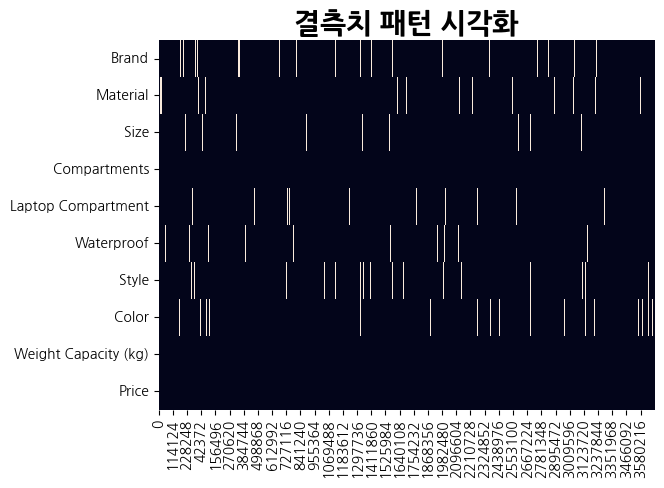

In [17]:
# 결측치 패턴 시각화
sns.heatmap(train_df.isnull().T, cbar=False)
plt.title('결측치 패턴 시각화', fontsize = 20, fontweight = 'bold')
plt.show()

In [18]:
# 결측치 수 따른 케이스 수
sample_df = train_df.copy()
sample_df["NaN_Count"] = sample_df.isnull().sum(axis=1)

sample_df["NaN_Count"].value_counts()

NaN_Count
0    3288503
1     658082
2      43732
3       3604
4        376
5         21
Name: count, dtype: int64

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
결측치 패턴 시각화<br><br>
시각적으로 특별한 패턴이 보이지는 않는다<br>
</div>

<div style="background-color:red; padding:10px; border-radius:10px; font-size:40px;">
피처와 타겟의 상관관계 및 분포 시각화
</div>

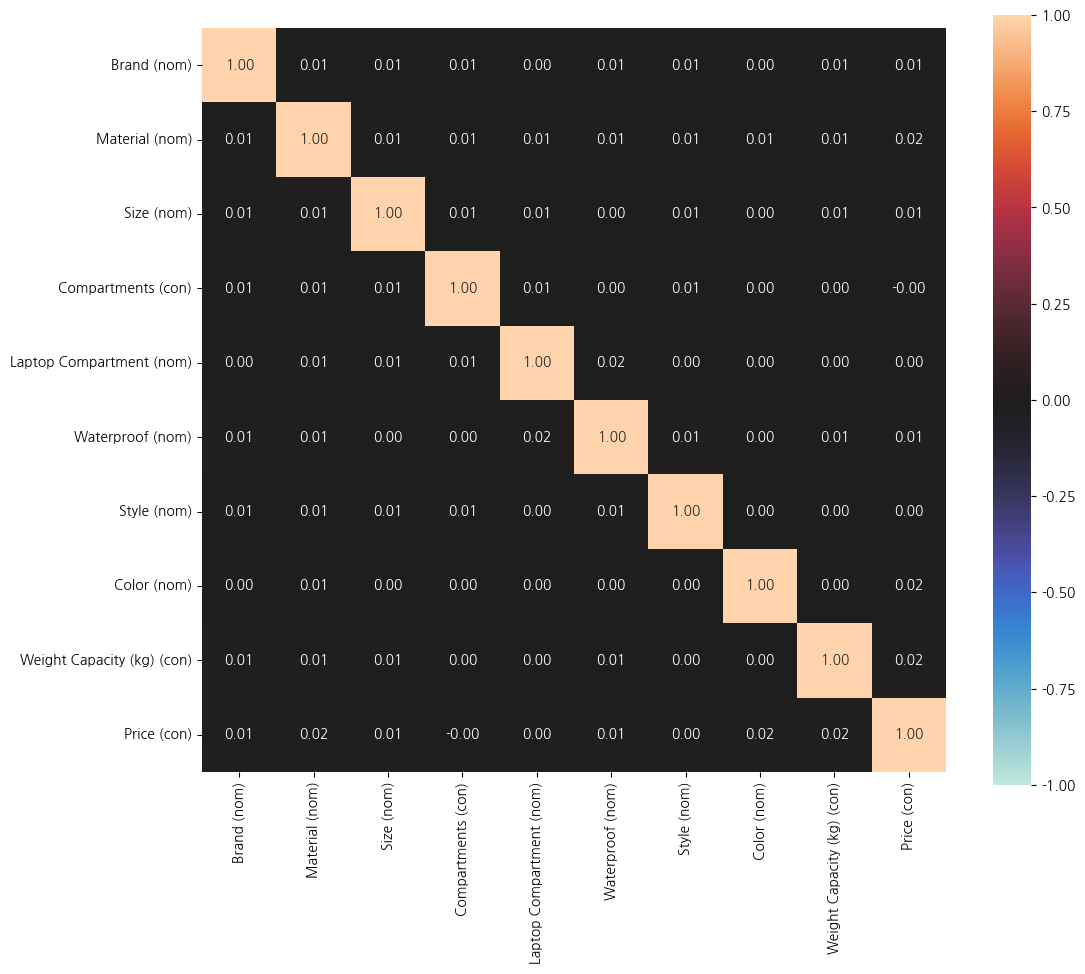

In [19]:
associations(train_df, figsize=(12,10), mark_columns=True)
plt.show()

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
변수 간 상관관계<br><br>
연속형 피처끼리는 피어슨 상관계수를,<br>
범주형 피처끼리는 크래머의 V를,<br>
연속형피쳐와 범주형 피쳐끼리는 에타제곱으로<br>
상관계수를 계산하는 방법을 사용하는 히트맵을 그려봤으나<br>
이상할정도로 상관관계가 보이지 않는다<br>
</div>

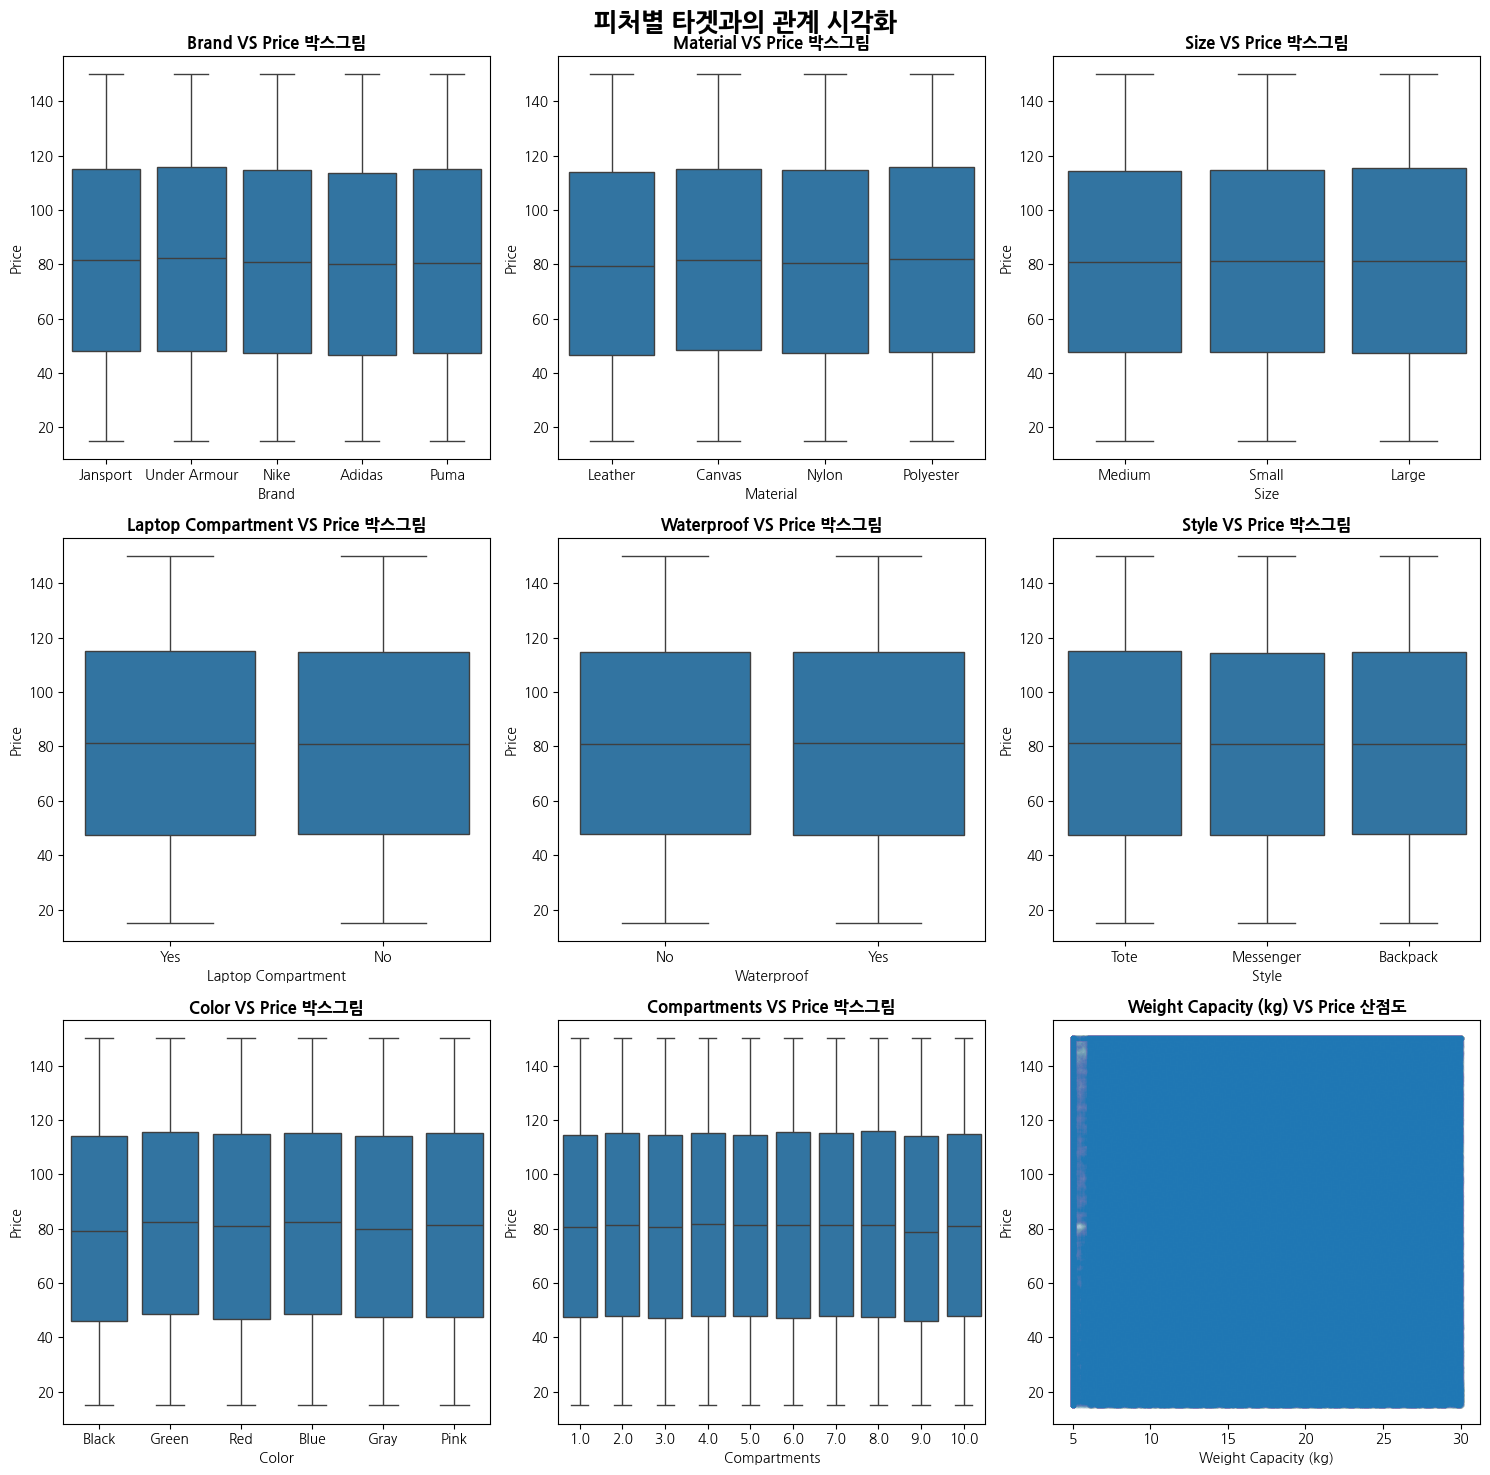

In [ ]:
# 피처별 타겟과의 관계 시각화

num_cols = list(train_df.select_dtypes('float64').columns)
cat_cols = list(train_df.select_dtypes('object').columns)
num_cols.remove('Compartments')
cat_cols.extend(['Compartments'])

fig, ax = plt.subplots(3,3, figsize = (15,15))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data = train_df, x = col , y = 'Price' , ax = ax[i])
    ax[i].set_title(f'{col} VS Price 박스그림',  fontweight = 'bold', fontsize = 12)
    
sns.scatterplot(data = train_df, x = 'Weight Capacity (kg)', y = 'Price', alpha = 0.01 , s = 20, ax = ax[8])
ax[8].set_title('Weight Capacity (kg) VS Price 산점도', fontweight = 'bold', fontsize = 12)

plt.suptitle("피처별 타겟과의 관계 시각화", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
피쳐들과 타겟의 관계 <br><br>
피처들과 타겟의 관계에 특별한 부분이 없어보이기 때문에<br>
어떤 피처가 타겟 예측에 큰 영향을 끼칠지 예상이 되지 않는다<br>
</div>

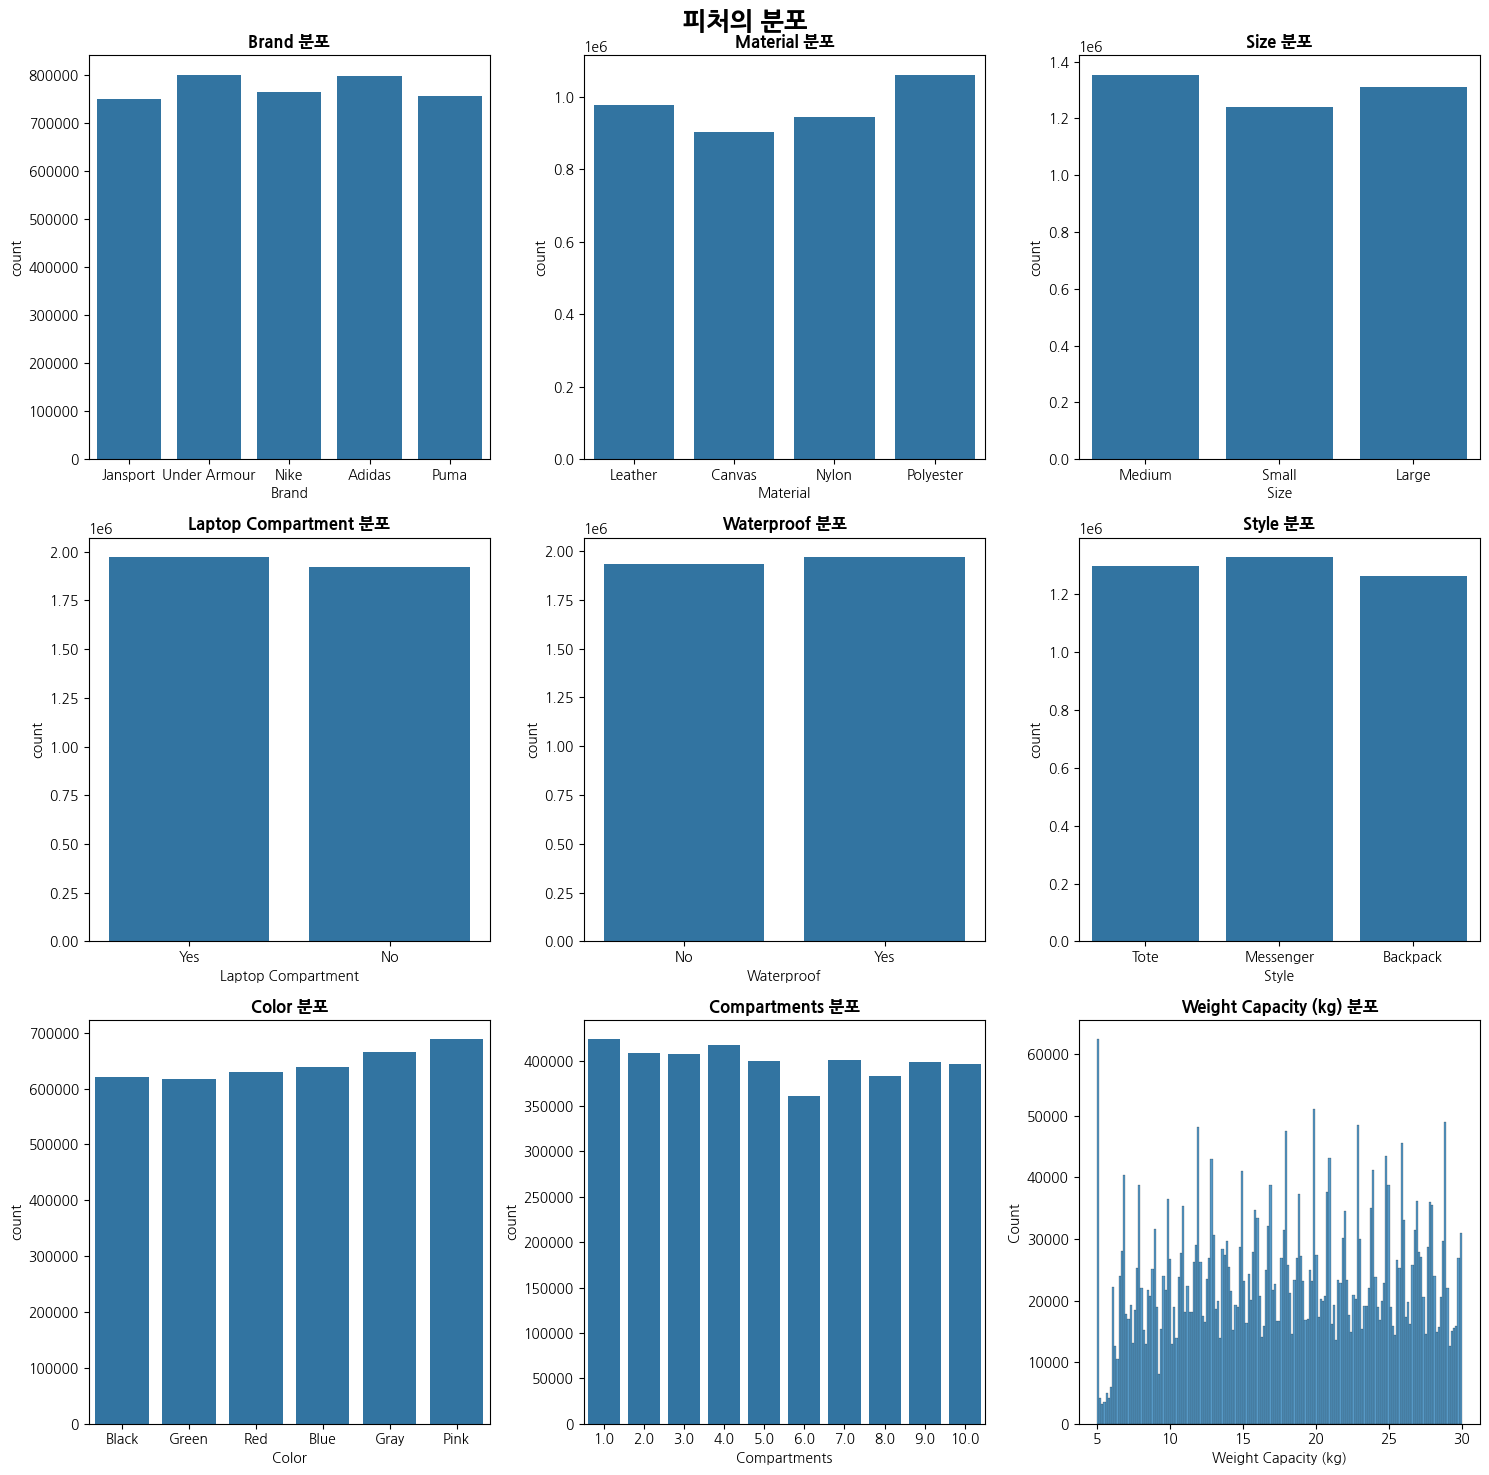

In [ ]:
# 피처의 분포 시각화

fig, ax = plt.subplots(3,3, figsize = (15,15))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data = train_df, x = col , ax = ax[i])
    ax[i].set_title(f'{col} 분포',  fontweight = 'bold', fontsize = 12)

sns.histplot(data = train_df, x = 'Weight Capacity (kg)' , ax = ax[8])
ax[8].set_title('Weight Capacity (kg) 분포', fontweight = 'bold', fontsize = 12)

plt.suptitle("피처의 분포", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

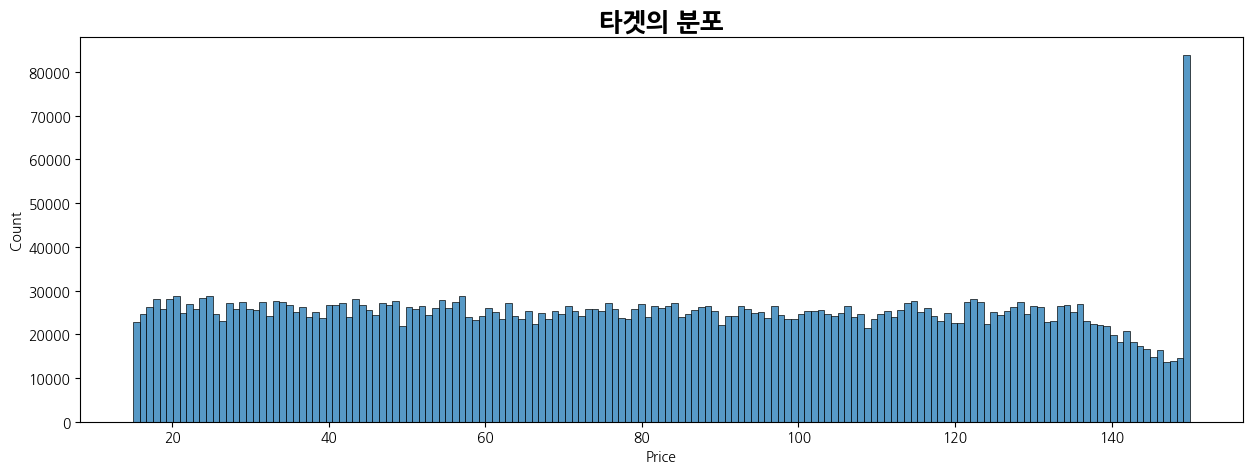

In [ ]:
# 타겟 분포 시각화

plt.figure(figsize = (15,5))
sns.histplot(data = train_df, x = 'Price')
plt.title('타겟의 분포', fontsize=18, fontweight='bold')
plt.show()

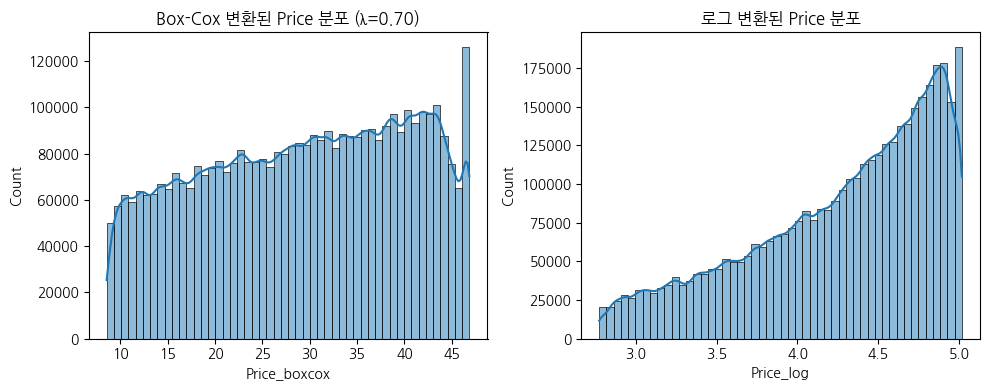

In [ ]:
# 변수 변환 시도

sample_df = train_df.copy()

# 박스 콕스 변환
sample_df["Price_boxcox"], lam = boxcox(sample_df["Price"] + 1)
# 로그변환 (log1p(x) = log(1 + x))
sample_df["Price_log"] = np.log1p(sample_df["Price"]) 

# 시각화
fig, ax = plt.subplots(1,2, figsize =(10,4))
ax = ax.flatten()

sns.histplot(sample_df["Price_boxcox"], bins=50, kde=True, ax = ax[0])
ax[0].set_title(f"Box-Cox 변환된 Price 분포 (λ={lam:.2f})")
sns.histplot(sample_df["Price_log"], bins=50, kde=True, ax = ax[1])
ax[1].set_title("로그 변환된 Price 분포")

plt.tight_layout()
plt.show()

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
타겟의 변수변환에 대해 <br><br>
타겟을 변수변환함으로써 비선형성을 완화하고자 했으나<br>
나중에 변수 변환을 사용해서 학습해보면서<br>
타겟의 변수변환이 필요한지 비교해봐야할 것 같다<br>
</div>

78781


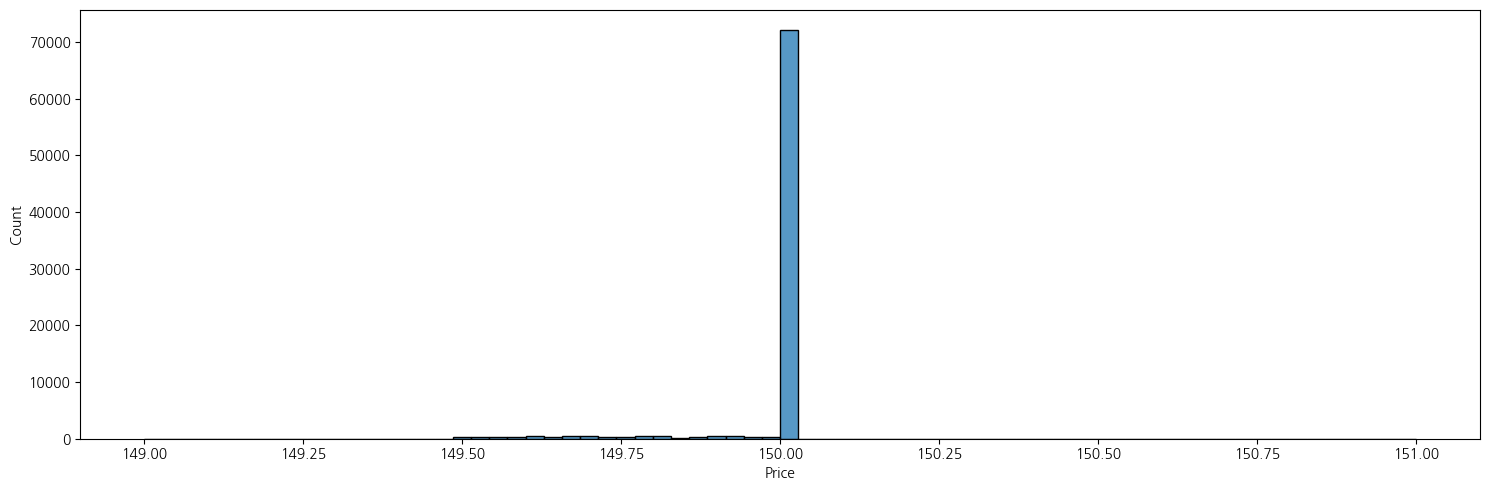

In [45]:
# 타겟 분포 우측에 집중적으로 분포하고 있는데
# 집중적으로 분포하고 있는 케이스들과 아닌 케이스들이 어떤 차이가 있는지 확인해보기로 한다
# 일단 집중적으로 분포하고 있는 케이스들과 아닌 케이스들의 경계를 찾아보기로 한다

sample_df = train_df.copy()
sample_df = sample_df[sample_df['Price'] >= 149.5]

print(len(sample_df['Price']))

plt.figure(figsize = (15,5))
sns.histplot(data=sample_df, x='Price', binrange=(149, 151))
plt.tight_layout()
plt.show()

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
타겟분포 우측에 집중되어 있는 데이터에 대해<br><br>
타겟 분포의 우측부분만 따로 히스토그램을 그려보면 Price가 150인 케이스들이 집중적으로 분포해 있는 것이다<br>
이 케이스들은 72,080개이며 이 케이스들에 대해 살펴보자<br>
만약 150인 케이스들의 특징이 명확하다면 예측에 도움될 수 있는 피처를 추가할 수 있을 것이다
</div>

In [46]:
sample_df = train_df.copy()
high_df = sample_df[sample_df['Price'] == 150]
low_df = sample_df[sample_df['Price'] < 150]

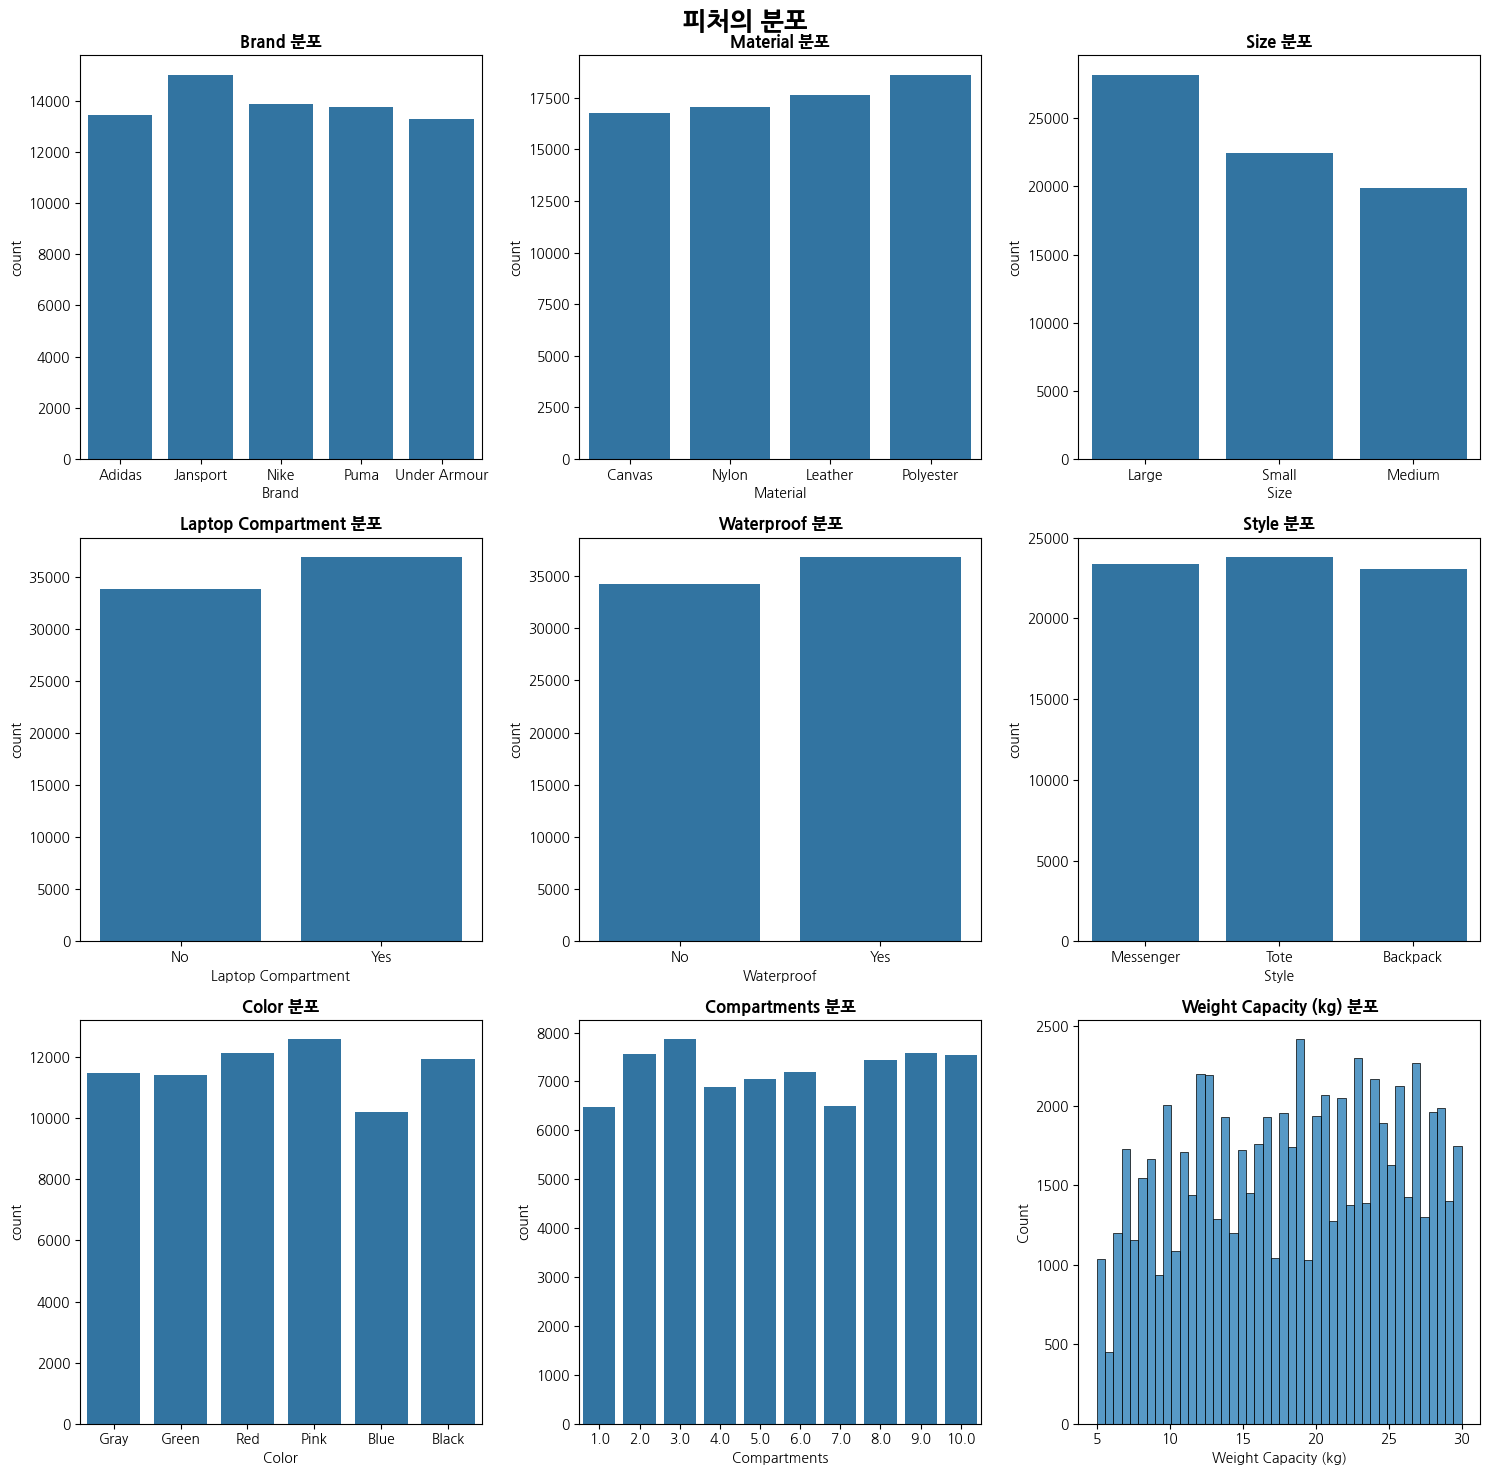

In [ ]:
# 타겟이 150인 케이스들의 분포

fig, ax = plt.subplots(3,3, figsize = (15,15))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data = high_df, x = col , ax = ax[i])
    ax[i].set_title(f'{col} 분포',  fontweight = 'bold', fontsize = 12)

sns.histplot(data = high_df, x = 'Weight Capacity (kg)' , ax = ax[8])
ax[8].set_title('Weight Capacity (kg) 분포', fontweight = 'bold', fontsize = 12)

plt.suptitle("피처의 분포", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

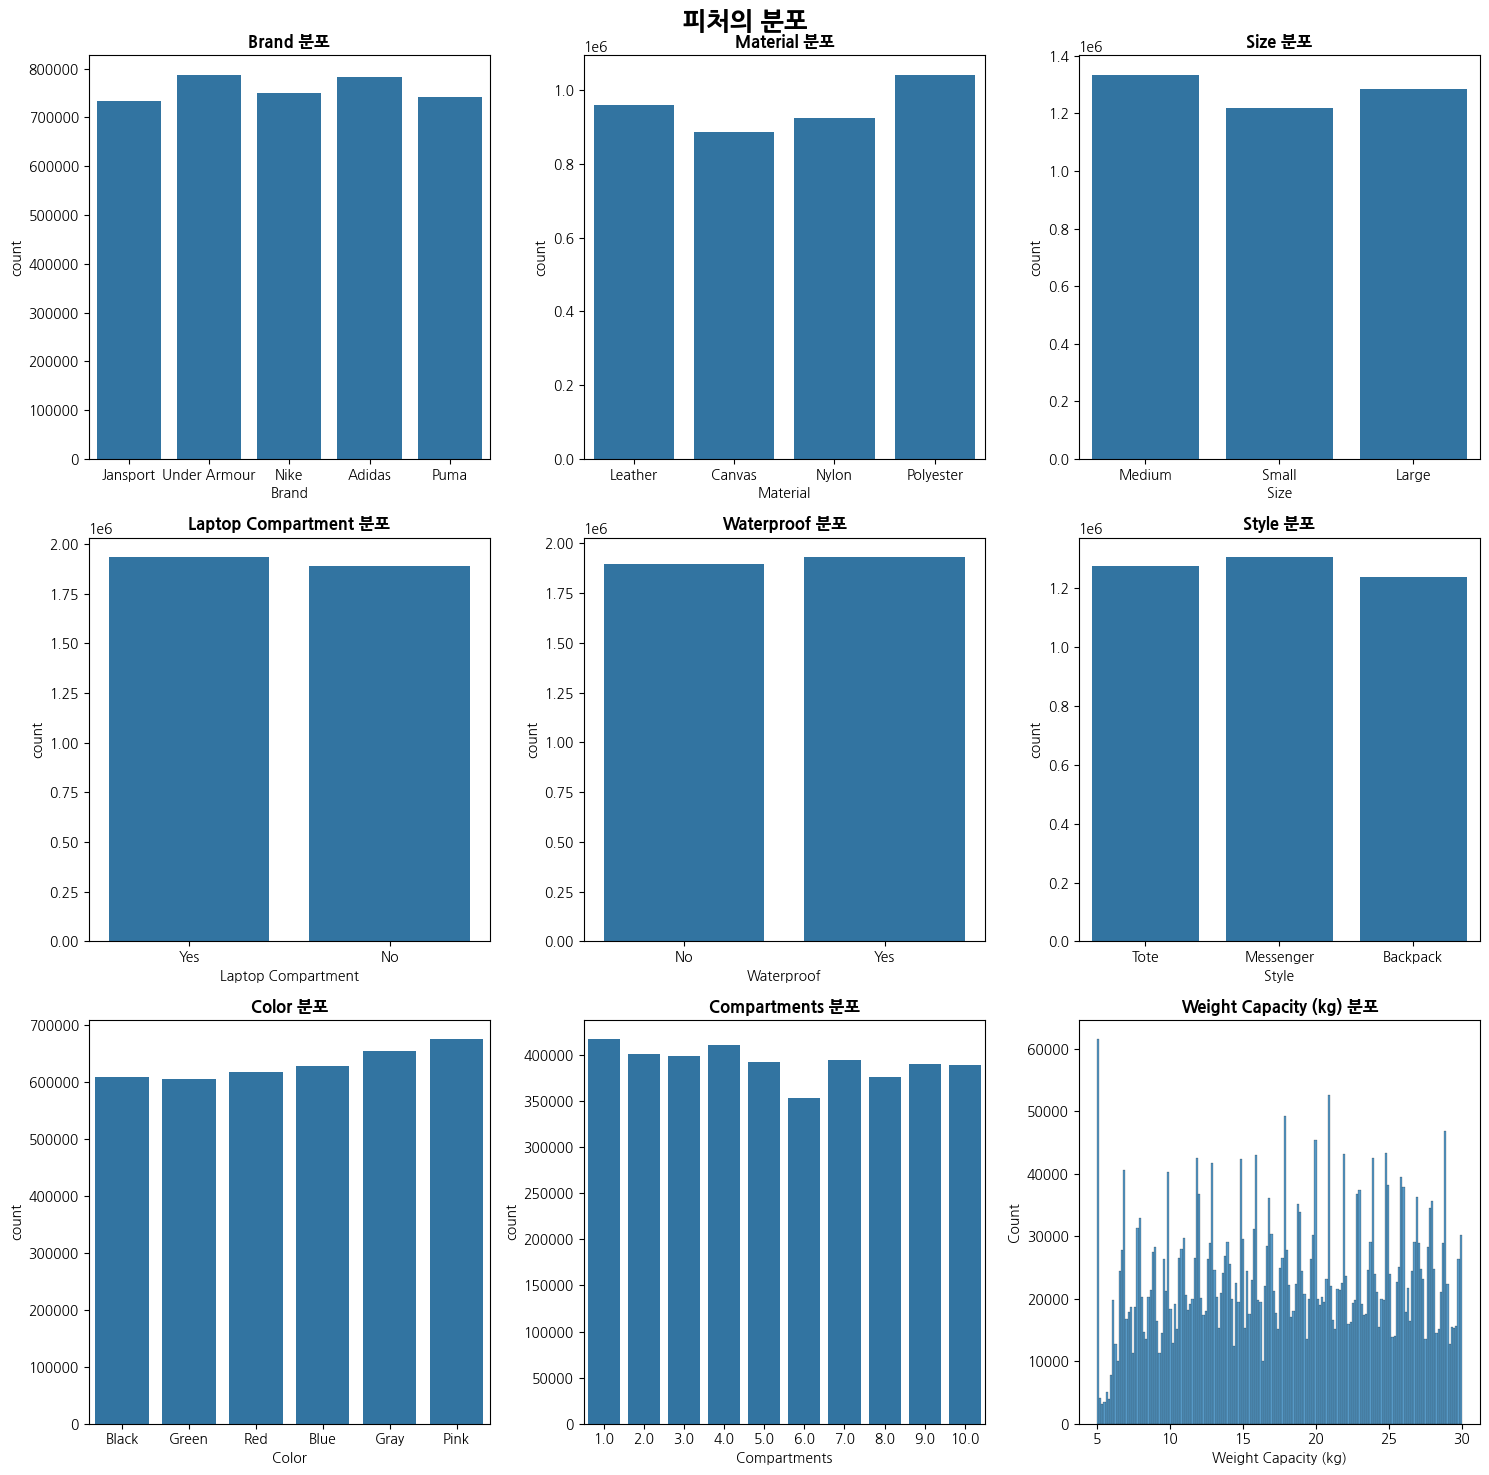

In [ ]:
# 타겟이 150이 아닌 케이스들의 분포

fig, ax = plt.subplots(3,3, figsize = (15,15))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data = low_df, x = col , ax = ax[i])
    ax[i].set_title(f'{col} 분포',  fontweight = 'bold', fontsize = 12)

sns.histplot(data = low_df, x = 'Weight Capacity (kg)' , ax = ax[8])
ax[8].set_title('Weight Capacity (kg) 분포', fontweight = 'bold', fontsize = 12)

plt.suptitle("피처의 분포", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [51]:
sample_df = train_df.copy()
very_high_df = sample_df[sample_df['Price'] == 150]
high_df = sample_df[(sample_df['Price'] >= 100) & (sample_df['Price'] < 150)]
mid_df = sample_df[(sample_df['Price'] >= 50) & (sample_df['Price'] < 100)]
low_df = sample_df[(sample_df['Price'] >= 0) & (sample_df['Price'] < 50)]

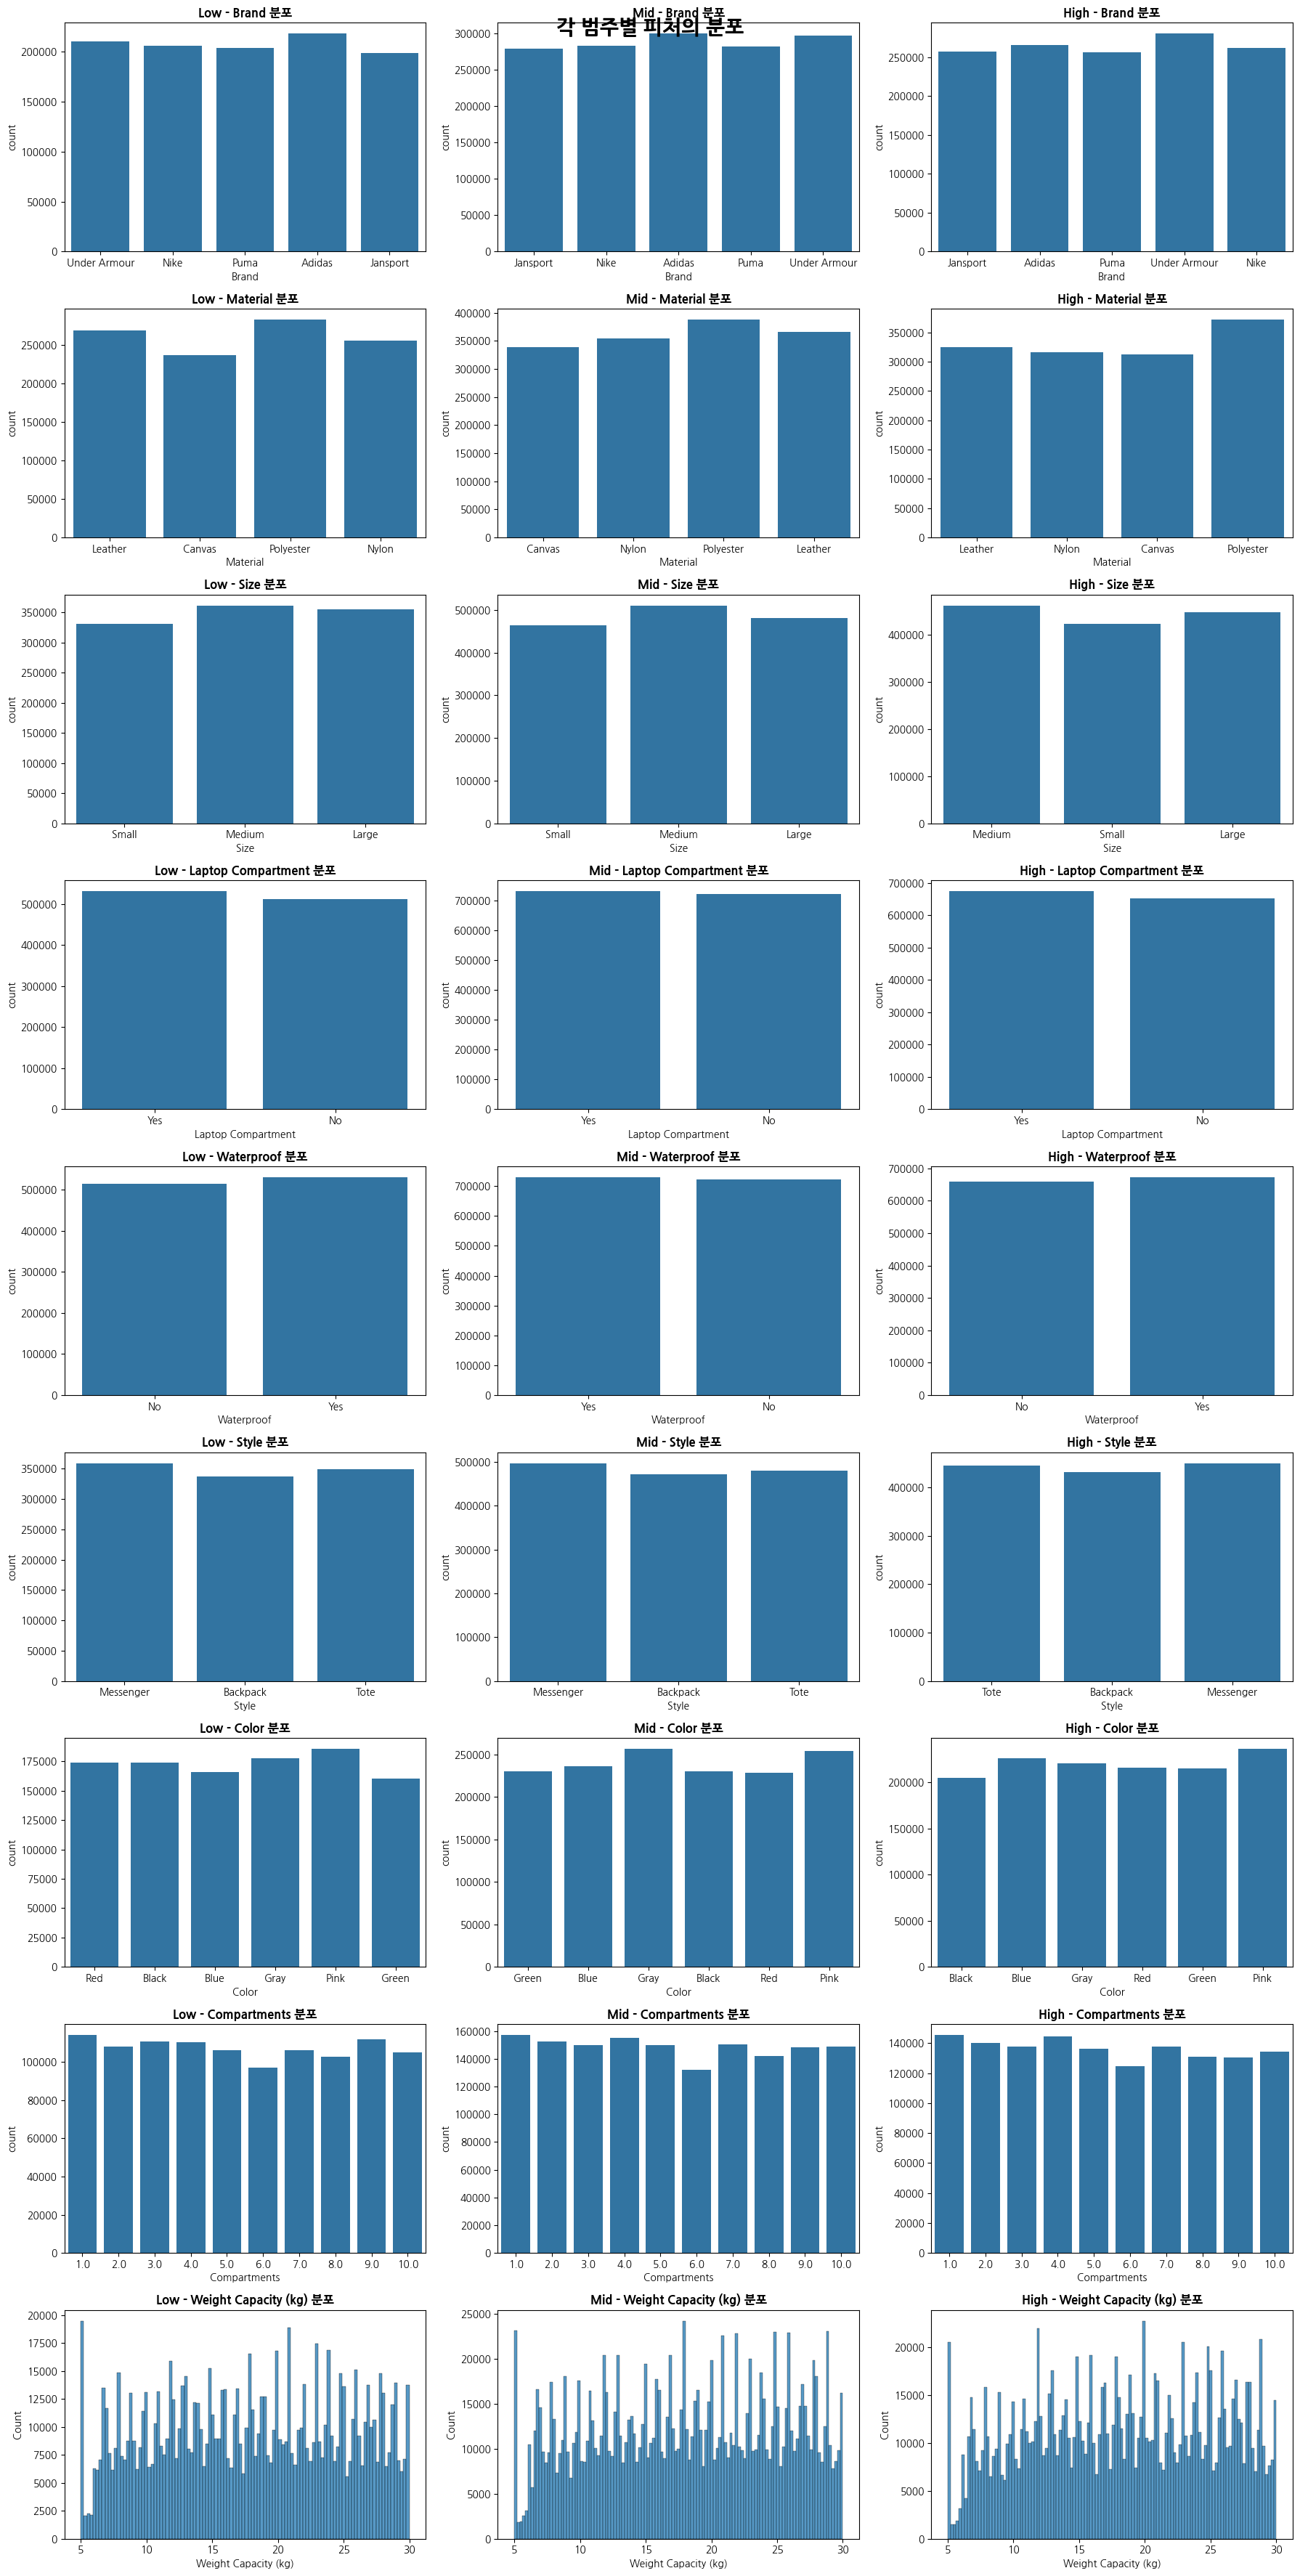

In [ ]:
# 타겟을 기준으로 데이터를 3개의 그룹으로 나누어 그룹별 특징이 있는지 시각화

# 9행 3열 서브플롯 생성
fig, ax = plt.subplots(9, 3, figsize=(18, 36)) 

# 서브플롯을 1차원 배열로 변환
ax = ax.flatten()

# 9개의 피처 반복
for i, col in enumerate(cat_cols):
    # 1열: low_df
    sns.countplot(data=low_df, x=col, ax=ax[i * 3]) 
    ax[i * 3].set_title(f'Low - {col} 분포', fontweight='bold', fontsize=12)

    # 2열: mid_df
    sns.countplot(data=mid_df, x=col, ax=ax[i * 3 + 1])  
    ax[i * 3 + 1].set_title(f'Mid - {col} 분포', fontweight='bold', fontsize=12)

    # 3열: high_df
    sns.countplot(data=high_df, x=col, ax=ax[i * 3 + 2]) 
    ax[i * 3 + 2].set_title(f'High - {col} 분포', fontweight='bold', fontsize=12)

# 마지막 행에 연속형 변수 추가
sns.histplot(data=low_df, x='Weight Capacity (kg)', ax=ax[8 * 3])
ax[8 * 3].set_title('Low - Weight Capacity (kg) 분포', fontweight='bold', fontsize=12)

sns.histplot(data=mid_df, x='Weight Capacity (kg)', ax=ax[8 * 3 + 1])
ax[8 * 3 + 1].set_title('Mid - Weight Capacity (kg) 분포', fontweight='bold', fontsize=12)

sns.histplot(data=high_df, x='Weight Capacity (kg)', ax=ax[8 * 3 + 2])
ax[8 * 3 + 2].set_title('High - Weight Capacity (kg) 분포', fontweight='bold', fontsize=12)

# 전체 제목 추가
plt.suptitle("각 범주별 피처의 분포", fontsize=20, fontweight='bold')

# 레이아웃 정리
plt.tight_layout()
plt.show()

<div style="background-color:gray; padding:10px; border-radius:10px; font-size:18px;">
타겟을 구간별로 나누어 분석<br><br>
한쪽으로 치우친 부분과 아닌 부분으로 나누기, 타겟을 기준으로 3개의 데이터 나누기 방법을 사용해서<br>
구간 별 피처와 타겟의 관계가 달라지는지 확인해보았으나<br>
특징이 전혀 보이지 않는다<br>
이 데이터는 타겟에 대한 신호가 매우 미약한 데이터인것으로 보인다<br>
일단 데이터 전처리와 학습단계로 넘어가서 어떤 전처리가 필요한지 확인해보아야겠다
</div>